#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css

In [3]:
css()

# Dewey og Bayes

Her har du selve notebooken som henter ut navn og lager graf.

### Start med å importere modulene

In [4]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\nbtext.py`

### Spesialkommandoer

navnenettverk(urn, navneliste, tokenmap) som brukes etter redigering av tokenmap, ellers

nb.make_network_name_graph(.....


In [5]:
coord_name = lambda navn, tm_red: [[na for na in navn[0] if (na,) in [z[0] for z in tm_red ]]] + [list(set(na) & set([z[0] for z in tm_red])) for na in navn[1:]]

navnenettverk = lambda urn, tokener, tm: nb.make_network_name_graph(urn, coord_name(tokener, nb.token_map_to_tuples(tm)), tokenmap = nb.token_map_to_tuples(tm))

## Bygg korpus og analysér

Hent URN-er fra tekst eller metadata

In [25]:
korpus = nb.book_urn(author='hamsun%', period=(1920, 2016), limit=1000)

In [26]:
korpus = nb.unique_urns(korpus)

In [27]:
nb.frame(nb.metadata(korpus))

,0,1,2,3,4,5,6
0,2014021807151,"Hamsun, Knut",1921,Dikte,Gyldendal,nob,
1,2010121406011,"Hamsun, Knut",1934,ede Verker,"Gyldendal;Oslo : Gyldendal, 1934-1936",nob,
2,2012102107013,"Hamsun, Tore",1984,Mannen fra havet,Gyldendal,nob,
3,2011081506058,"Hamsun, Knut",2005,Landstrykere,De norske bokklubbene,nob,
4,2013061808070,"Hamsun, Knut",1921,Aftenrøde,Gyldendal,nob,
5,2009010510003,"Hamsun, Knut",1921,Ny jord,Svenska Andelsförlaget,swe,
6,2007110801032,"Hamsun, Knut",1990,Segen der Erde,Deutscher Taschenbuch Verlag,ger,nob
7,2008061104048,"Hamsun, Tore",1990,Efter år og dag,Gyldendal;Gjøvik trykkeri,nob,
8,2016051148095,"Hamsun, Knut",1921,vandrer spiller med sordin,Gyldendal,nob,
9,2008073000047,"Hamsun, Knut",1996,Dronningen av Saba,Gyldendal,nob,


In [28]:
book = 2008020501024

In [32]:
navn = nb.names(book, cutoff=5)

In [33]:
navneliste = nb.token_map(navn, strings=True)

In [34]:
navneliste

['Arentsen ==> Arentsen_Rosa',
 'Arentsens ==> Arentsen_Rosa',
 'Arn ==> Arn',
 'Aron ==> Aron',
 'Barfod ==> Rosa_Barfod',
 'Barnefar ==> Jens_Barnefar',
 'Benoni ==> Benoni_Hartvigsen',
 'Benonis ==> Benoni_Hartvigsen',
 'Bergen ==> Bergen',
 'Bramaputra ==> Bramaputra',
 'Dem ==> Dem',
 'Deres ==> Deres',
 'Dokker ==> Dokker',
 'Dokkers ==> Dokker',
 'Edvarda ==> Edvarda_Mack',
 'Ellen ==> Ellen',
 'England ==> England',
 'Ferdinand ==> Ferdinand_Mack',
 'Fredrik ==> Fredrik_Mensa',
 'Funtus ==> Funtus',
 'Gilbert ==> Gilbert',
 'Glahn ==> Glahn',
 'Gud ==> Gud',
 'Guds ==> Gud',
 'Hamsun ==> Hamsun',
 'Hartvigsen ==> Benoni_Hartvigsen',
 'Hartvigsens ==> Benoni_Hartvigsen',
 'Hopan ==> Hopan',
 'Hugh ==> Sir_Hugh_Trevelyan',
 'Jens ==> Jens_Barnefar',
 'Jerusalem ==> Jerusalem',
 'Kristiania ==> Kristiania',
 'Levion ==> Levion',
 'Lofoten ==> Lofoten',
 'Lofotturen ==> Lofotturen',
 'Mack ==> Ferdinand_Mack',
 'Macks ==> Ferdinand_Mack',
 'Malene ==> Malene',
 'Marelius ==> Mareli

lagre til fil

In [12]:
import json
with open('navneliste_' + str(book), 'w') as f:
    json.dump(navneliste, f)

In [107]:
navn_redigert = [
    #'Arentsen ==> Arentsen_Rosa',
 #'Arentsens ==> Arentsen_Rosa',
 'Arn ==> Arn',
 'Aron ==> Aron',
 #'Barfod ==> Barfod_',
 'Barnefar ==> Jens_Barnefar',
 'Benoni ==> Benoni_',
 'Benonis ==> Benoni_',
 #'Bergen ==> Bergen',
 'Bramaputra ==> Bramaputra',
 #'Dem ==> Dem',
 #'Deres ==> Deres',
 #'Dokker ==> Dokker',
 #'Dokkers ==> Dokker',
 'Edvarda ==> Edvarda_Mack',
 'Ellen ==> Ellen',
# 'England ==> England',
 'Ferdinand ==> Ferdinand_Mack',
 'Fredrik ==> Fredrik_Mensa',
 'Funtus ==> Funtus',
 'Gilbert ==> Gilbert',
 'Glahn ==> Glahn',
 #'Gud ==> Gud',
 #'Guds ==> Gud',
 #'Hamsun ==> Hamsun',
 'Hartvigsen ==> Benoni_',
 'Hartvigsens ==> Benoni_',
 #'Hopan ==> Hopan',
 'Hugh ==> Sir_Hugh_Trevelyan',
 'Jens ==> Jens_Barnefar',
 #'Jerusalem ==> Jerusalem',
 #'Kristiania ==> Kristiania',
 'Levion ==> Levion',
 'Lofoten ==> Lofoten',
 'Lofotturen ==> Lofotturen',
 'Mack ==> Ferdinand_Mack',
 'Macks ==> Ferdinand_Mack',
 'Malene ==> Malene',
 'Marelius ==> Marelius',
 'Margrete ==> Margrete',
 'Martha ==> Martha',
 'Menneske ==> Ole_Menneske',
 'Mensa ==> Fredrik_Mensa',
 'Mons ==> Mons',
 'Munken ==> Munken_Vendt',
 'Nikolai ==> Nikolai_Arentsen',
 'Ole ==> Ole_Menneske',
 #'Overkroppen ==> Overkroppen',
 'Petrine ==> Petrine',
 'Postbenoni ==> Benoni_',
 'Rosa ==> Rosa_',
 'Rosas ==> Rosa_',
 'Rosengaard ==> Rosengaard',
 'Schøning ==> Schøning',
 'Sir ==> Sir_Hugh_Trevelyan',
 'Sirilund ==> Sirilund',
 'Sirilunds ==> Sirilund',
 'Sorosi ==> Sorosi',
 'Steen ==> Steen',
 #'Svend ==> Rosa_Svend',
 'Tonna ==> Tonna',
 #'Torpelviken ==> Torpelviken',
 'Trevelyan ==> Sir_Hugh_Trevelyan',
 'Vendt ==> Munken_Vendt',
 'Vendts ==> Munken_Vendt',
 'Villads ==> Villads',
 #'Arentsen_Rosa ==> Arentsen_Rosa',
 'Benoni_Hartvigsen ==> Benoni_',
 'Rosa_Barfod ==> Rosa_',
 'Ferdinand_Mack ==> Ferdinand_Mack',
 'Ole_Menneske ==> Ole_Menneske',
 'Fredrik_Mensa ==> Fredrik_Mensa',
 'Edvarda_Mack ==> Edvarda_Mack',
 'Nikolai_Arentsen ==> Nikolai_Arentsen',
 #'Rosa_Svend ==> Rosa_Svend',
 'Hugh_Trevelyan ==> Sir_Hugh_Trevelyan',
 #'Benoni_Mack ==> Benoni_Mack',
 'Sir_Hugh ==> Sir_Hugh_Trevelyan',
 'Nikolai_Arentsens ==> Nikolai_Arentsen',
 #'Mack_Benoni ==> Benoni_Mack',
 'Munken_Vendt ==> Munken_Vendt',
 'Benoni_Hartvigsen ==> Benoni_',
 'Benoni_Hartvigsens ==> Benoni_',
 'Jens_Barnefar ==> Jens_Barnefar',
 'Mack_Svend ==> Mack_Svend',
 'Munken_Vendts ==> Munken_Vendt',
 'Sir_Hugh_Trevelyan ==> Sir_Hugh_Trevelyan']

In [110]:
nb.urn_concordance(urns=book, word='Arentsen', size=200)

"Benoni ; Rosa, Hamsun, Knut, 1994",så var det kanske ung,Arentsen,Rosa besøkte når hun var
"Benoni ; Rosa, Hamsun, Knut, 1994",han utlært . Og ung,Arentsen,hadde så meget til hvite
"Benoni ; Rosa, Hamsun, Knut, 1994",Foreløbig drev ung,Arentsen,om på veiene og bort
"Benoni ; Rosa, Hamsun, Knut, 1994",En dag kom ung,Arentsen,også drivende til Sirilund .
"Benoni ; Rosa, Hamsun, Knut, 1994",Alt ? svarte ung,Arentsen,uforstyrret . Ingenlunde !
"Benoni ; Rosa, Hamsun, Knut, 1994","har heroppe , sa ung",Arentsen,og tok sig op til
"Benoni ; Rosa, Hamsun, Knut, 1994","Da , fortsatte ung",Arentsen,", reiste håret sig op"
"Benoni ; Rosa, Hamsun, Knut, 1994",gjøre sig uvenner med Nikolai,Arentsen,", den lovkyndige . Nei"
"Benoni ; Rosa, Hamsun, Knut, 1994","dig rundt , bad ung",Arentsen,. Han reiste sig ikke
"Benoni ; Rosa, Hamsun, Knut, 1994","du vil , sa ung",Arentsen,og reiste sig i det
"Benoni ; Rosa, Hamsun, Knut, 1994",mund på ham . Ung,Arentsen,utbrøt :


In [101]:
navn_redigert

['Arn ==> Arn',
 'Aron ==> Aron',
 'Barnefar ==> Jens_Barnefar',
 'Benoni ==> Benoni_',
 'Benonis ==> Benoni_',
 'Bramaputra ==> Bramaputra',
 'Edvarda ==> Edvarda_Mack',
 'Ellen ==> Ellen',
 'Ferdinand ==> Ferdinand_Mack',
 'Fredrik ==> Fredrik_Mensa',
 'Funtus ==> Funtus',
 'Gilbert ==> Gilbert',
 'Glahn ==> Glahn',
 'Hartvigsen ==> Benoni_Hartvigsen',
 'Hartvigsens ==> Benoni_Hartvigsen',
 'Hugh ==> Sir_Hugh_Trevelyan',
 'Jens ==> Jens_Barnefar',
 'Levion ==> Levion',
 'Lofoten ==> Lofoten',
 'Lofotturen ==> Lofotturen',
 'Mack ==> Ferdinand_Mack',
 'Macks ==> Ferdinand_Mack',
 'Malene ==> Malene',
 'Marelius ==> Marelius',
 'Margrete ==> Margrete',
 'Martha ==> Martha',
 'Menneske ==> Ole_Menneske',
 'Mensa ==> Fredrik_Mensa',
 'Mons ==> Mons',
 'Munken ==> Munken_Vendt',
 'Nikolai ==> Nikolai_Arentsen',
 'Ole ==> Ole_Menneske',
 'Petrine ==> Petrine',
 'Postbenoni ==> Benoni_',
 'Rosa ==> Rosa_',
 'Rosas ==> Rosa_',
 'Rosengaard ==> Rosengaard',
 'Schøning ==> Schøning',
 'Sir ==>

In [108]:
G_redigert = navnenettverk(book, navn, navn_redigert)

In [39]:
G_default = nb.make_network_name_graph(book, navn)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


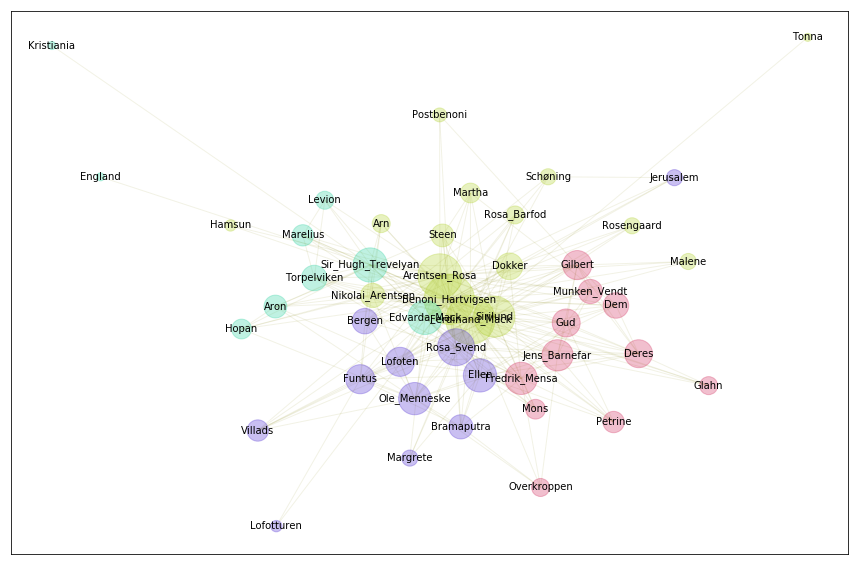

In [105]:
gnl.show_graph(G_default)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


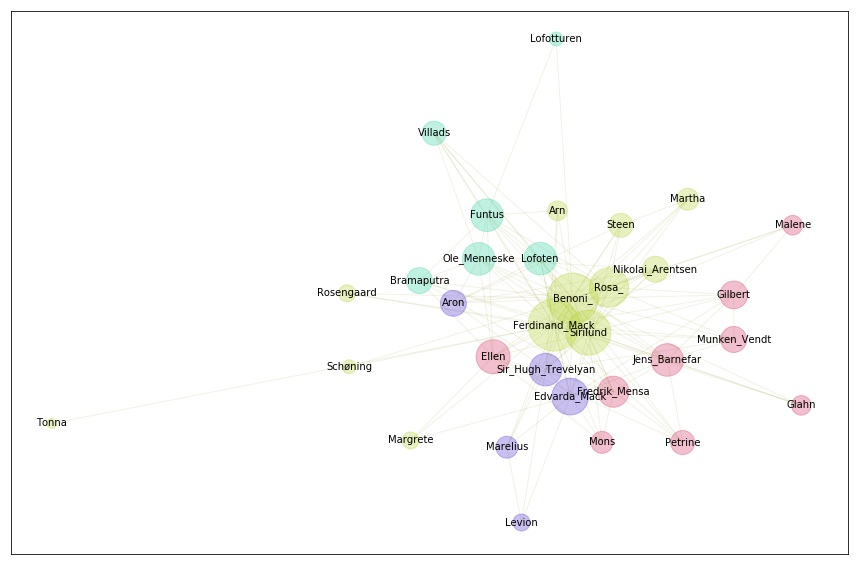

In [109]:
gnl.show_graph(G_redigert)

In [42]:
gnl.show_communities(G_redigert)


Ferdinand_Mack-Benoni_Hartvigsen :  Ferdinand_Mack, Benoni_Hartvigsen, Arentsen_Rosa, Sirilund, Aron, Steen, Nikolai_Arentsen, Rosa_Barfod, Martha, Arn, Schøning, Postbenoni, Rosengaard, Tonna

Rosa_Svend-Ole_Menneske :  Rosa_Svend, Ole_Menneske, Funtus, Ellen, Lofoten, Bergen, Bramaputra, Villads, Margrete, Lofotturen

Edvarda_Mack-Sir_Hugh_Trevelyan :  Edvarda_Mack, Sir_Hugh_Trevelyan, Marelius, Levion

Jens_Barnefar-Fredrik_Mensa :  Jens_Barnefar, Fredrik_Mensa, Gilbert, Munken_Vendt, Petrine, Mons, Glahn, Malene



In [43]:
gnl.show_communities(G_default)

Benoni_Hartvigsen-Ferdinand_Mack :  Benoni_Hartvigsen, Ferdinand_Mack, Arentsen_Rosa, Sirilund, Dokker, Nikolai_Arentsen, Steen, Martha, Rosa_Barfod, Arn, Schøning, Malene, Rosengaard, Postbenoni, Hamsun, Tonna

Sir_Hugh_Trevelyan-Edvarda_Mack :  Sir_Hugh_Trevelyan, Edvarda_Mack, Torpelviken, Aron, Marelius, Hopan, Levion, England, Kristiania

Rosa_Svend-Ellen :  Rosa_Svend, Ellen, Ole_Menneske, Lofoten, Funtus, Bergen, Bramaputra, Villads, Overkroppen, Margrete, Jerusalem, Lofotturen

Fredrik_Mensa-Jens_Barnefar :  Fredrik_Mensa, Jens_Barnefar, Gilbert, Deres, Gud, Dem, Munken_Vendt, Petrine, Mons, Glahn

